# Volume-wise T2*/S0 estimation with t2smap

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
from glob import glob

import numpy as np
import pandas as pd
from nilearn import image, plotting
from tedana import workflows

# Needs to come after tedana import
%matplotlib inline

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:92: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data_dir = os.path.abspath("../data")
func_dir = os.path.join(data_dir, "sub-04570/func/")
data_files = [
    os.path.join(func_dir, "sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz"),
    os.path.join(func_dir, "sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz"),
]
echo_times = [12., 28., 44., 60.]
mask_file = os.path.join(func_dir, "sub-04570_task-rest_space-scanner_desc-brain_mask.nii.gz")
confounds_file = os.path.join(func_dir, "sub-04570_task-rest_desc-confounds_timeseries.tsv")

out_dir = os.path.join(data_dir, "fit")

In [3]:
workflows.t2smap_workflow(
    data_files, 
    echo_times, 
    out_dir=out_dir, 
    mask=mask_file, 
    prefix="sub-04570_task-rest_space-scanner",
    fittype="loglin",
    fitmode="ts",
)

INFO     t2smap:t2smap_workflow:196 Using output directory: /Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/fit
INFO     t2smap:t2smap_workflow:206 Loading input data: ['/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz', '/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz', '/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz', '/Users/taylor/Documents/tsalo/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz']
INFO     t2smap:t2smap_workflow:222 Using user-defined mask
INFO     t2smap:t2smap_workflow:225 Computing adaptive T2* map
INFO     t2smap:t2smap_workflow:243 Computing optimal combination
INFO     combine:make_optc

In [4]:
out_files = sorted(glob(os.path.join(out_dir, "*")))
out_files = [os.path.basename(f) for f in out_files]
print("\n".join(out_files))

sub-04570_task-rest_space-scanner_S0map.nii.gz
sub-04570_task-rest_space-scanner_T2starmap.nii.gz
sub-04570_task-rest_space-scanner_dataset_description.json
sub-04570_task-rest_space-scanner_desc-full_S0map.nii.gz
sub-04570_task-rest_space-scanner_desc-full_T2starmap.nii.gz
sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz


<ipython-input-5-cdf3e60a9ae4>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


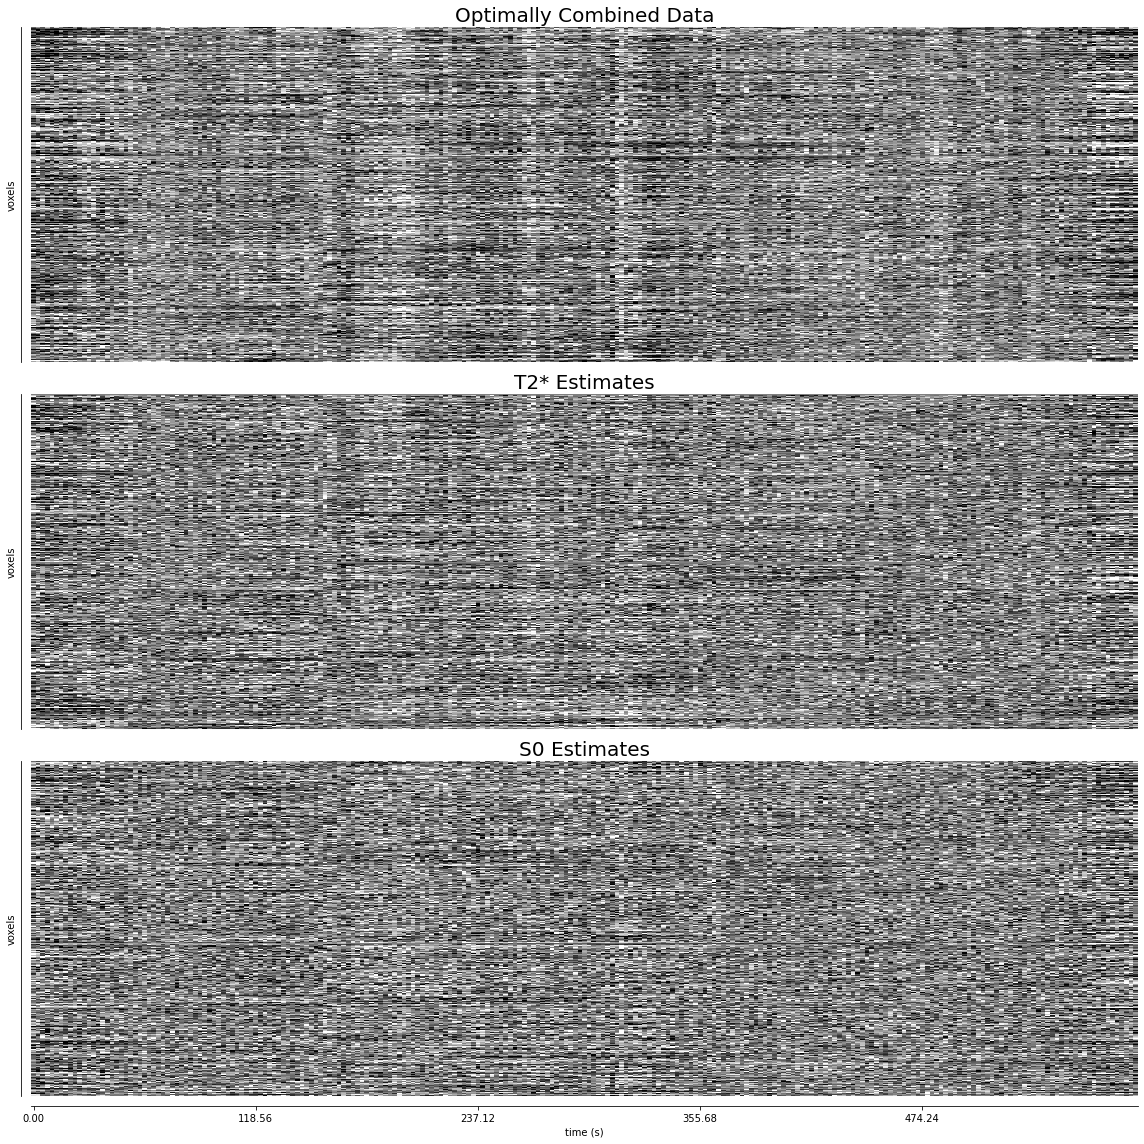

In [5]:
fig, axes = plt.subplots(figsize=(16, 16), nrows=3)

plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"), 
    axes=axes[0], 
    figure=fig,
)
axes[0].set_title("Optimally Combined Data", fontsize=20)
plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_T2starmap.nii.gz"), 
    axes=axes[1], 
    figure=fig,
)
axes[1].set_title("T2* Estimates", fontsize=20)
plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_S0map.nii.gz"), 
    axes=axes[2], 
    figure=fig,
)
axes[2].set_title("S0 Estimates", fontsize=20)
axes[0].xaxis.set_visible(False)
axes[1].xaxis.set_visible(False)
axes[0].spines["bottom"].set_visible(False)
axes[1].spines["bottom"].set_visible(False)
fig.tight_layout()
fig.show()

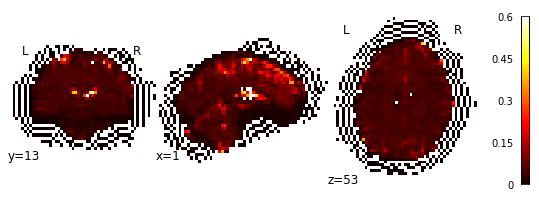

In [6]:
plotting.plot_stat_map(
    image.mean_img(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_T2starmap.nii.gz")),
    vmax=0.6,
    draw_cross=False,
    bg_img=None,
)

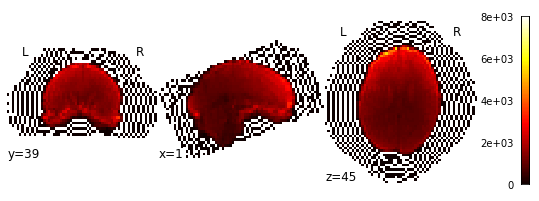

In [7]:
plotting.plot_stat_map(
    image.mean_img(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_S0map.nii.gz")),
    vmax=8000,
    draw_cross=False,
    bg_img=None,
)

<ipython-input-8-12a38dc880cd>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


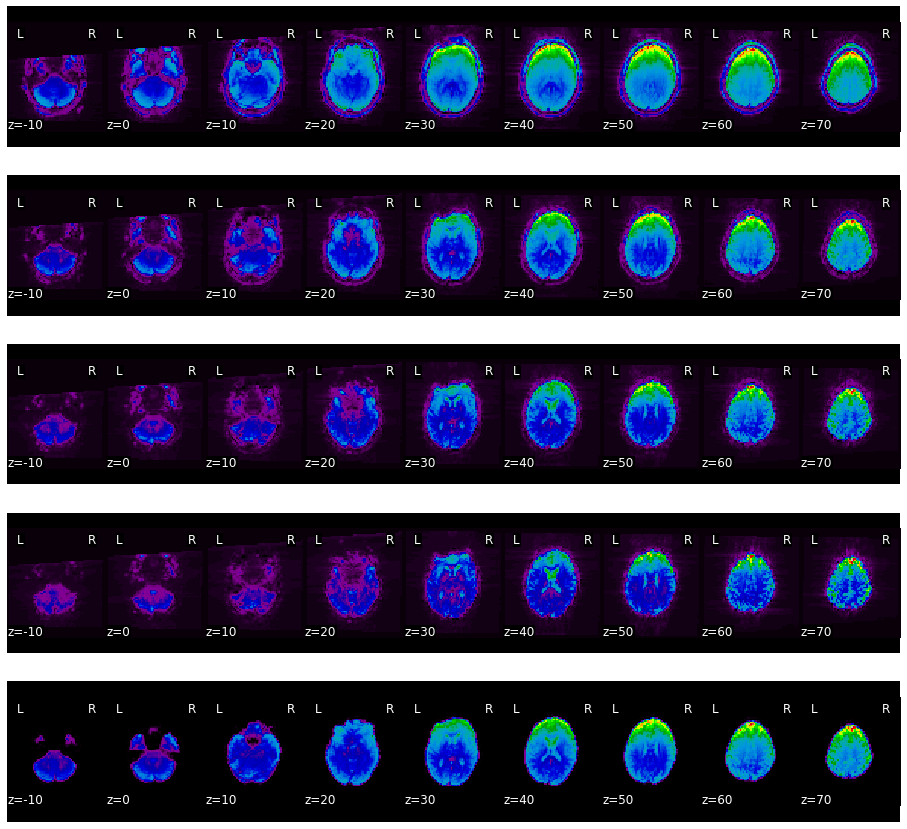

In [8]:
fig, axes = plt.subplots(figsize=(16, 15), nrows=5)
plotting.plot_epi(
    image.mean_img(data_files[0]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[0],
)
plotting.plot_epi(
    image.mean_img(data_files[1]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[1],
)
plotting.plot_epi(
    image.mean_img(data_files[2]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[2],
)
plotting.plot_epi(
    image.mean_img(data_files[3]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[3],
)
plotting.plot_epi(
    image.mean_img(os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz")),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    axes=axes[4],
)
fig.show()

<string>:1: RuntimeWarning: invalid value encountered in true_divide
/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
<ipython-input-9-a927dca6d30a>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


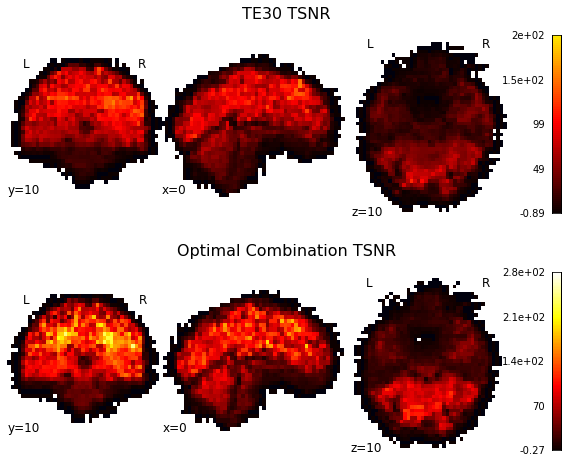

In [9]:
te30_tsnr = image.math_img(
    '(np.nanmean(img, axis=3) / np.nanstd(img, axis=3)) * mask', 
    img=data_files[1],
    mask=mask_file,
)
oc_tsnr = image.math_img(
    '(np.nanmean(img, axis=3) / np.nanstd(img, axis=3)) * mask', 
    img=os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"),
    mask=mask_file,
)
vmax = np.nanmax(np.abs(oc_tsnr.get_fdata()))

fig, axes = plt.subplots(figsize=(10, 8), nrows=2)
plotting.plot_stat_map(
    te30_tsnr,
    draw_cross=False,
    bg_img=None,
    threshold=0.1,
    cut_coords=[0, 10, 10],
    vmax=vmax,
    symmetric_cbar=False,
    axes=axes[0],
)
axes[0].set_title("TE30 TSNR", fontsize=16)
plotting.plot_stat_map(
    oc_tsnr,
    draw_cross=False,
    bg_img=None,
    threshold=0.1,
    cut_coords=[0, 10, 10],
    vmax=vmax,
    symmetric_cbar=False,
    axes=axes[1],
)
axes[1].set_title("Optimal Combination TSNR", fontsize=16)
fig.show()

<ipython-input-10-700b76bcc539>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


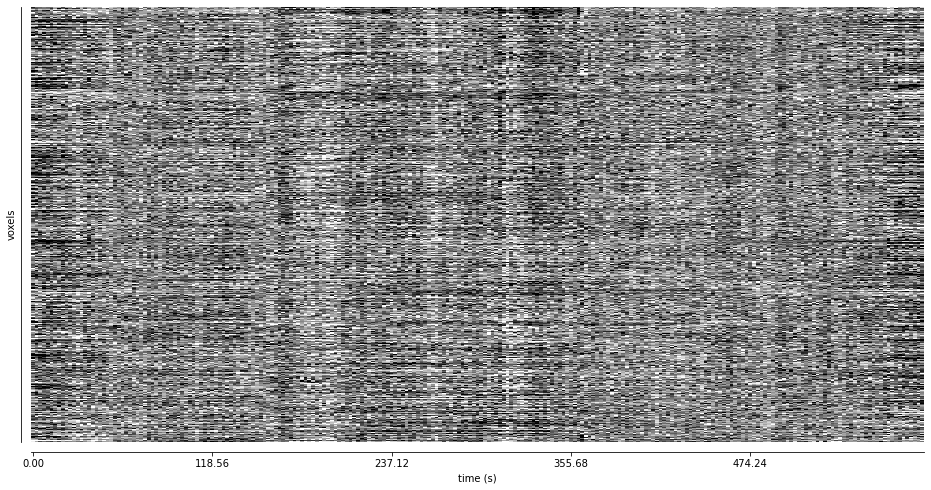

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_carpet(
    data_files[1],
    axes=ax,
)
fig.show()

<ipython-input-11-a52c7a470924>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


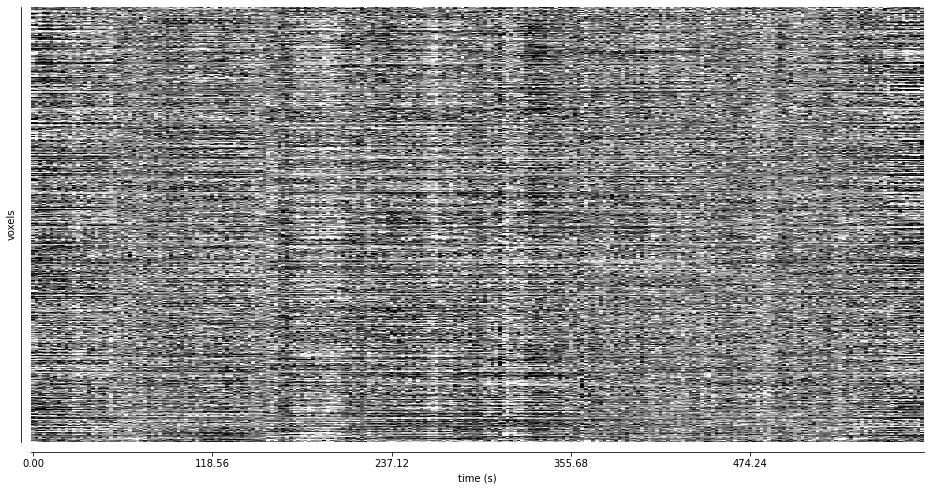

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"),
    axes=ax,
)
fig.show()